In [1]:
import env
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import utilities as utils
import sklearn.preprocessing

from pydataset import data
from sklearn.cluster import KMeans

In [2]:
iris_df = data("iris")

## 1. Clustering with the Iris Dataset

Using this lesson as a guide, perform clustering on the iris dataset.

* Choose features other than the ones used in the lesson.
* Visualize the results of your clustering.
* Use the elbow method to visually select a good value for k.
* Repeat the clustering, this time with 3 different features.

In [3]:
iris_df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [4]:
iris_df = iris_df.rename(columns={'Sepal.Length' : 'sepal_length', 'Sepal.Width' : 'sepal_width', 'Petal.Length' : 'petal_length', 'Petal.Width' : 'petal_width', 'Species' : 'species'})
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [5]:
X = iris_df[['sepal_width', 'petal_width']]
X.head()

,sepal_width,petal_width
1,3.5,0.2
2,3.0,0.2
3,3.2,0.2
4,3.1,0.2
5,3.6,0.2


<AxesSubplot:xlabel='sepal_width', ylabel='petal_width'>

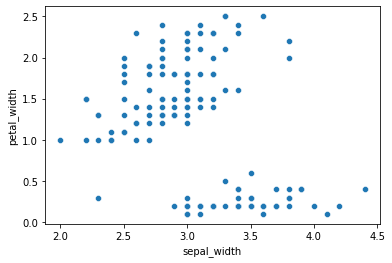

In [6]:
sns.scatterplot(x=X.sepal_width, y=X.petal_width)

In [7]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

iris_df['cluster'] = kmeans.predict(X)
iris_df.sample(14)

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
63,6.0,2.2,4.0,1.0,versicolor,0
12,4.8,3.4,1.6,0.2,setosa,1
144,6.8,3.2,5.9,2.3,virginica,2
72,6.1,2.8,4.0,1.3,versicolor,0
21,5.4,3.4,1.7,0.2,setosa,1
126,7.2,3.2,6.0,1.8,virginica,2
86,6.0,3.4,4.5,1.6,versicolor,2
116,6.4,3.2,5.3,2.3,virginica,2
8,5.0,3.4,1.5,0.2,setosa,1
113,6.8,3.0,5.5,2.1,virginica,2


In [8]:
iris_df.cluster = "cluster_" + iris_df.cluster.astype(str)

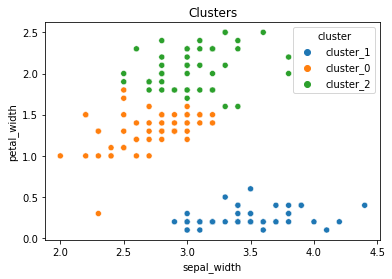

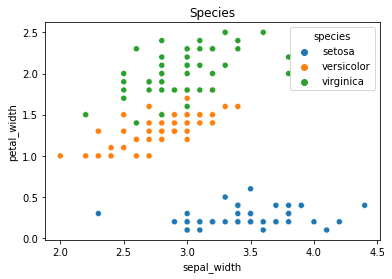

In [9]:
sns.scatterplot(x='sepal_width', y='petal_width', hue='cluster', data=iris_df)
plt.title("Clusters")
plt.show()
sns.scatterplot(x='sepal_width', y='petal_width', hue='species', data=iris_df)
plt.title("Species")
plt.show()

In [10]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centroids

,sepal_width,petal_width
0,2.707547,1.309434
1,3.451020,0.244898
2,3.041667,2.052083


In [11]:
iris_df.groupby('cluster')['sepal_width', 'petal_width'].mean()

,sepal_width,petal_width
cluster,,
cluster_0,2.707547,1.309434
cluster_1,3.451020,0.244898
cluster_2,3.041667,2.052083


Text(0.5, 1.0, 'Visualizing Cluster Centers')

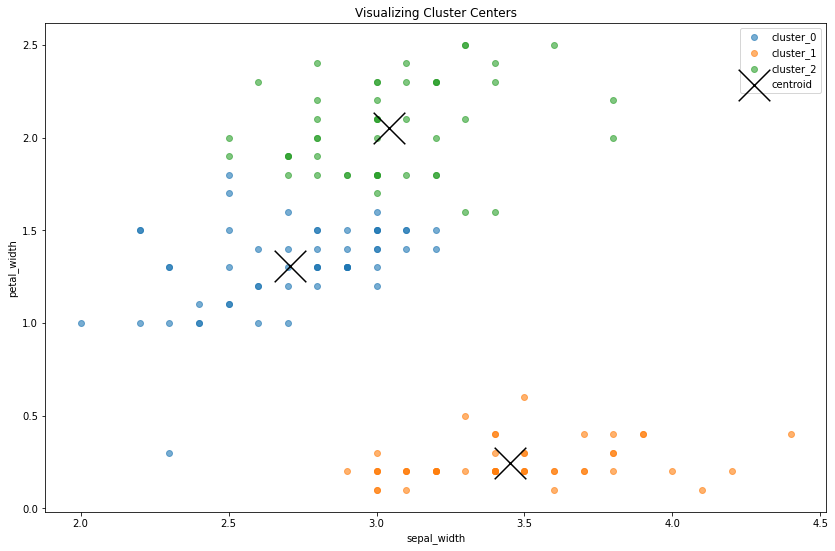

In [12]:
plt.figure(figsize=(14, 9))

for cluster, subset in iris_df.groupby('cluster'):
    plt.scatter(subset.sepal_width, subset.petal_width, label=cluster, alpha=.6)
    
centroids.plot.scatter(x='sepal_width', y='petal_width', c="black", marker="x", s=1000, ax=plt.gca(), label="centroid")

plt.legend()
plt.xlabel('sepal_width')
plt.ylabel('petal_width')
plt.title('Visualizing Cluster Centers')

In [13]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

KMeans(n_clusters=2)

In [14]:
iris_df['cluster_n2'] = kmeans.predict(X)
iris_df['cluster_n2'] = "cluster_" + iris_df.cluster_n2.astype(str)

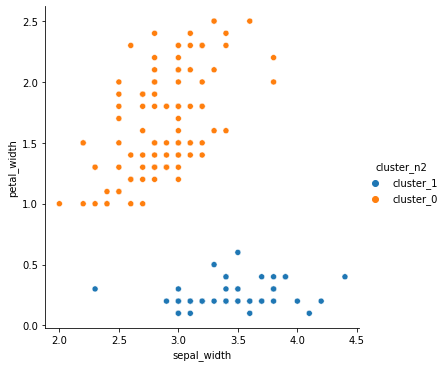

In [15]:
sns.relplot(x='sepal_width', y='petal_width', hue='cluster_n2', data=iris_df)

In [16]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

KMeans(n_clusters=5)

In [17]:
iris_df['cluster_n5'] = kmeans.predict(X)
iris_df['cluster_n5'] = "cluster_" + iris_df.cluster_n5.astype(str)

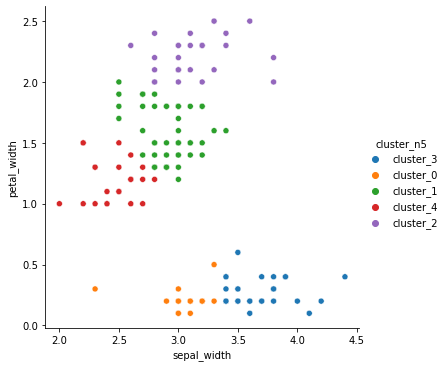

In [18]:
sns.relplot(x='sepal_width', y='petal_width', hue='cluster_n5', data=iris_df)

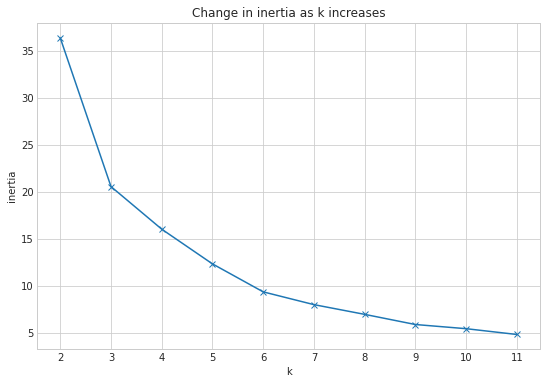

In [19]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

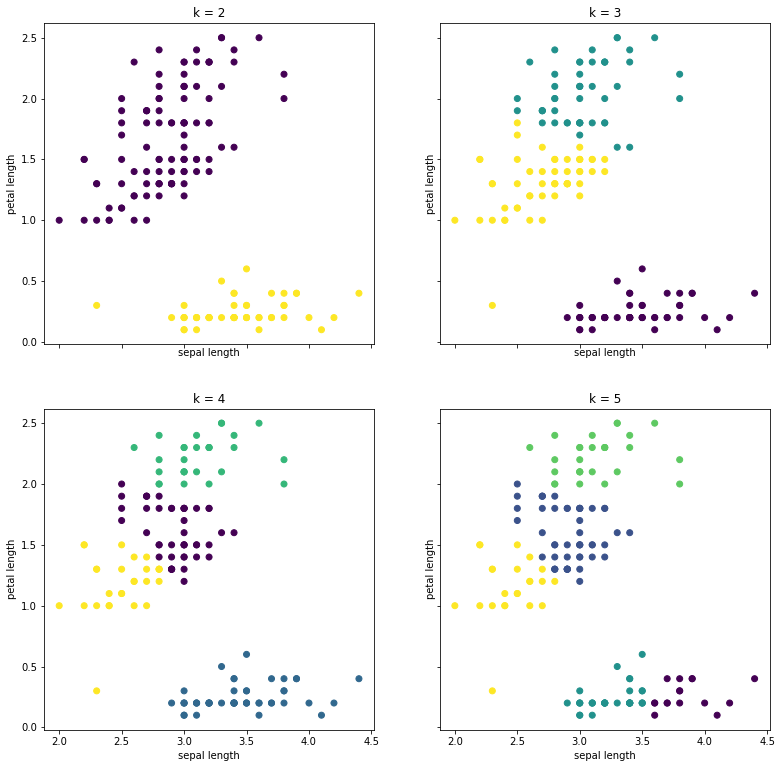

In [20]:
fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X).predict(X)
    ax.scatter(X.sepal_width, X.petal_width, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='sepal length', ylabel='petal length')

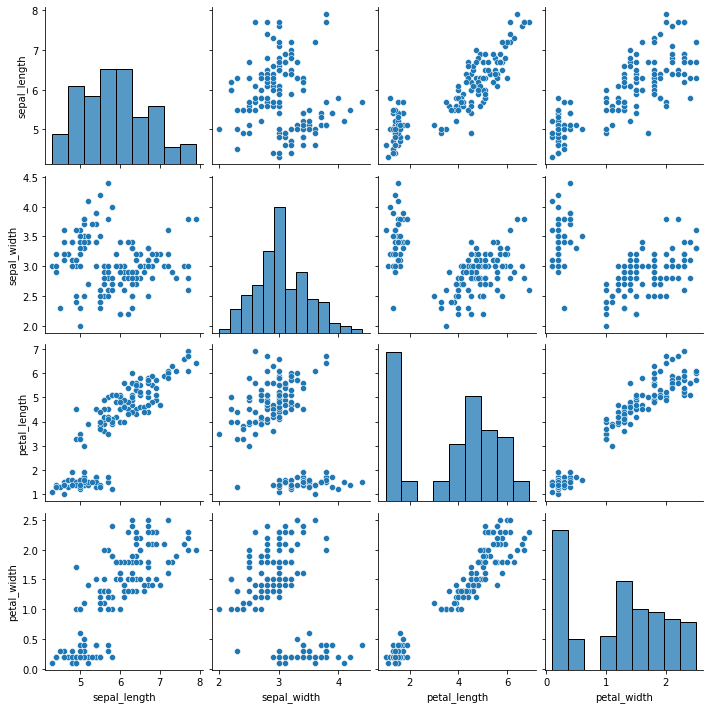

In [21]:
sns.pairplot(iris_df)

In [22]:
X_2 = iris_df[['sepal_width', 'sepal_length', 'petal_width']]

kmeans = KMeans(n_clusters=3)
kmeans.fit(X_2)

iris_df['cluster_n3'] = kmeans.predict(X_2)
iris_df['cluster_n3'] = "cluster_" + iris_df.cluster_n3.astype(str)

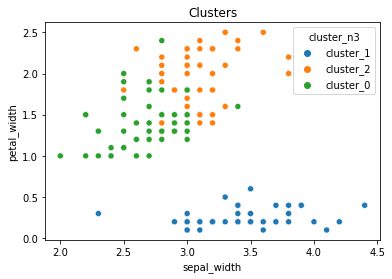

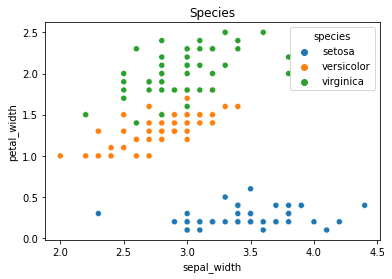

In [23]:
sns.scatterplot(x='sepal_width', y='petal_width', hue='cluster_n3', data=iris_df)
plt.title("Clusters")
plt.show()
sns.scatterplot(x='sepal_width', y='petal_width', hue='species', data=iris_df)
plt.title("Species")
plt.show()

Text(0.5, 1.0, 'Visualizing Cluster Centers')

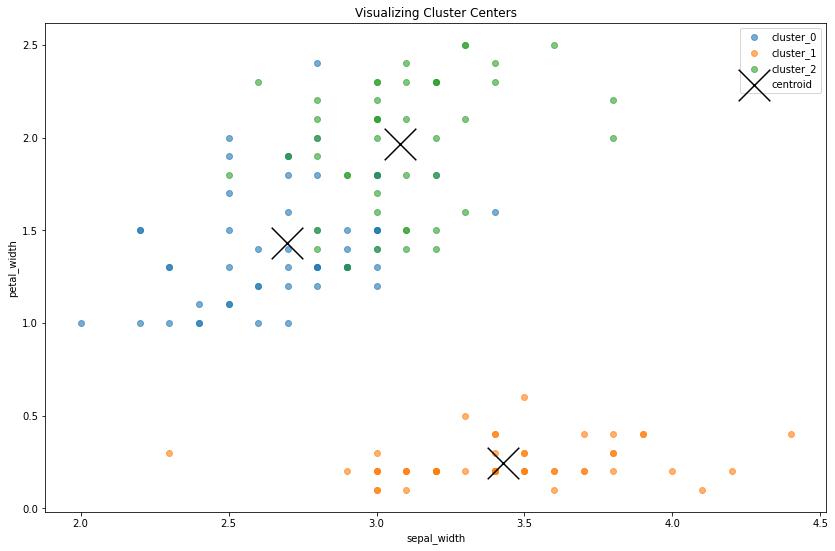

In [24]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X_2.columns)

plt.figure(figsize=(14, 9))

for cluster, subset in iris_df.groupby('cluster_n3'):
    plt.scatter(subset.sepal_width, subset.petal_width, label=cluster, alpha=.6)
    
centroids.plot.scatter(x='sepal_width', y='petal_width', c="black", marker="x", s=1000, ax=plt.gca(), label="centroid")

plt.legend()
plt.xlabel('sepal_width')
plt.ylabel('petal_width')
plt.title('Visualizing Cluster Centers')

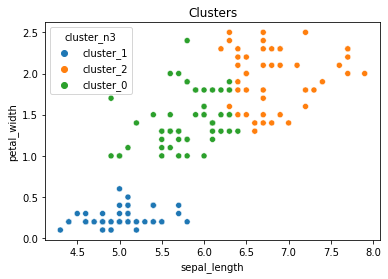

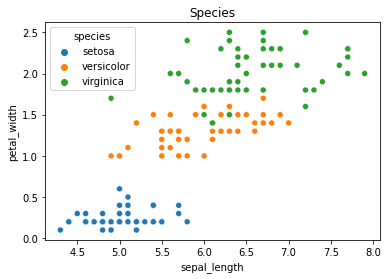

In [25]:
sns.scatterplot(x='sepal_length', y='petal_width', hue='cluster_n3', data=iris_df)
plt.title("Clusters")
plt.show()
sns.scatterplot(x='sepal_length', y='petal_width', hue='species', data=iris_df)
plt.title("Species")
plt.show()

Text(0.5, 1.0, 'Visualizing Cluster Centers')

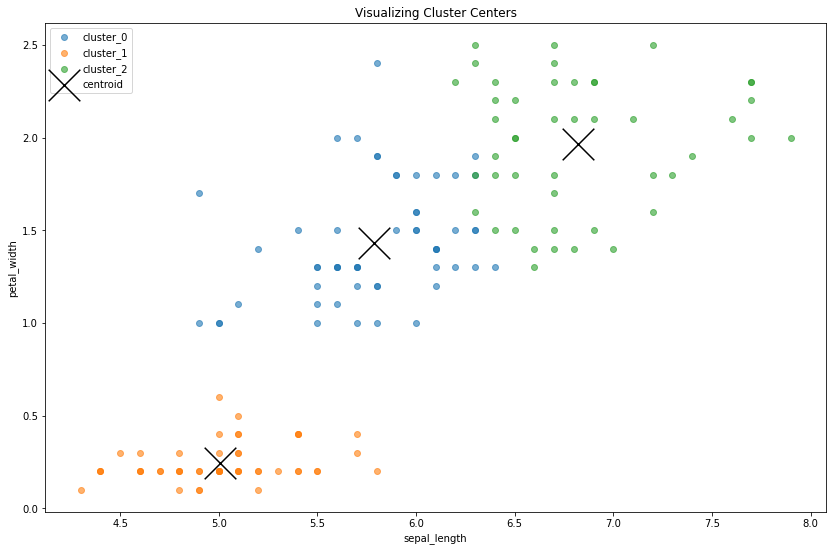

In [26]:
plt.figure(figsize=(14, 9))

for cluster, subset in iris_df.groupby('cluster_n3'):
    plt.scatter(subset.sepal_length, subset.petal_width, label=cluster, alpha=.6)
    
centroids.plot.scatter(x='sepal_length', y='petal_width', c="black", marker="x", s=1000, ax=plt.gca(), label="centroid")

plt.legend()
plt.xlabel('sepal_length')
plt.ylabel('petal_width')
plt.title('Visualizing Cluster Centers')

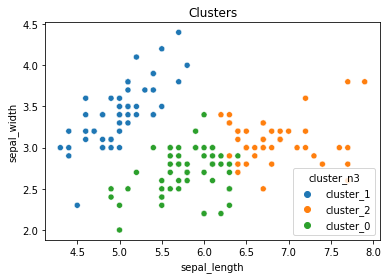

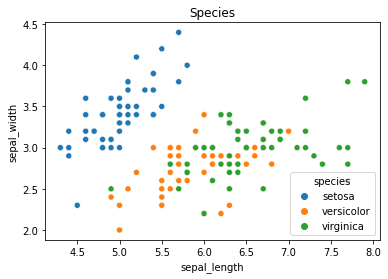

In [27]:
sns.scatterplot(x='sepal_length', y='sepal_width', hue='cluster_n3', data=iris_df)
plt.title("Clusters")
plt.show()
sns.scatterplot(x='sepal_length', y='sepal_width', hue='species', data=iris_df)
plt.title("Species")
plt.show()

Text(0.5, 1.0, 'Visualizing Cluster Centers')

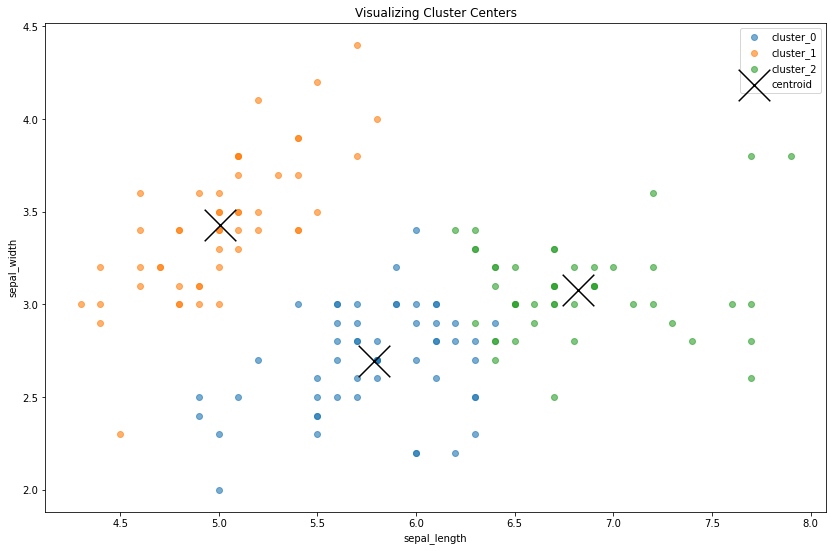

In [28]:
plt.figure(figsize=(14, 9))

for cluster, subset in iris_df.groupby('cluster_n3'):
    plt.scatter(subset.sepal_length, subset.sepal_width, label=cluster, alpha=.6)
    
centroids.plot.scatter(x='sepal_length', y='sepal_width', c="black", marker="x", s=1000, ax=plt.gca(), label="centroid")

plt.legend()
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.title('Visualizing Cluster Centers')

## 2. Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!



## 3. How does scaling impact the results of clustering?
Compare k-means clustering results on scaled and unscaled data. You can show how the resulting clusters differ either with descriptive statistics or visually.

In [29]:
mall_df = utils.generate_df("mall.csv", "select * from customers", utils.generate_db_url(env.user, env.password, env.host, "mall_customers"))

In [30]:
mall_df.sample(14)

,customer_id,gender,age,annual_income,spending_score
9,10,Female,30,19,72
169,170,Male,32,87,63
119,120,Female,50,67,57
17,18,Male,20,21,66
35,36,Female,21,33,81
79,80,Female,49,54,42
20,21,Male,35,24,35
135,136,Female,29,73,88
156,157,Male,37,78,1
91,92,Male,18,59,41


In [31]:
gender_dummies = pd.get_dummies(mall_df.gender, drop_first=True)
gender_dummies

,Male
0,1
1,1
2,0
3,0
4,0
...,...
195,0
196,0
197,1
198,1


In [32]:
gender_dummies = gender_dummies.rename(columns={'Male' : 'is_male'})
gender_dummies

,is_male
0,1
1,1
2,0
3,0
4,0
...,...
195,0
196,0
197,1
198,1


In [33]:
mall_df = pd.concat([mall_df, gender_dummies], axis=1)
mall_df

,customer_id,gender,age,annual_income,spending_score,is_male
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
195,196,Female,35,120,79,0
196,197,Female,45,126,28,0
197,198,Male,32,126,74,1
198,199,Male,32,137,18,1


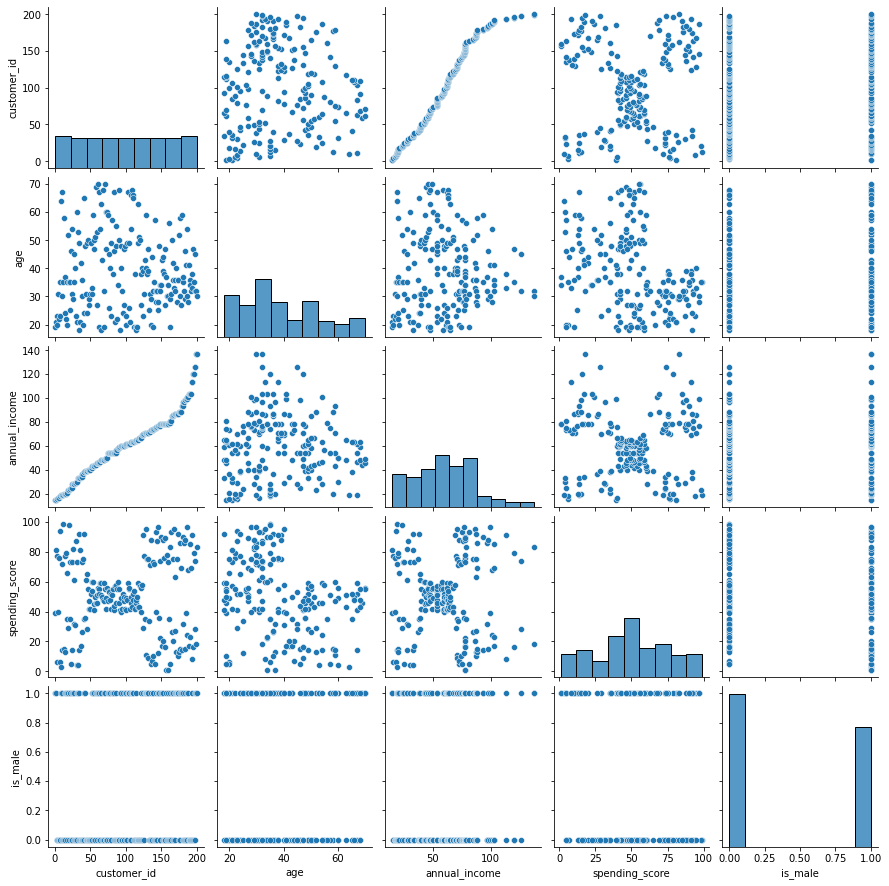

In [34]:
sns.pairplot(mall_df)

In [35]:
X = mall_df[['spending_score', 'annual_income']]

In [36]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

mall_df['cluster'] = kmeans.predict(X)
mall_df['cluster'] = "cluster_" + mall_df.cluster.astype(str)

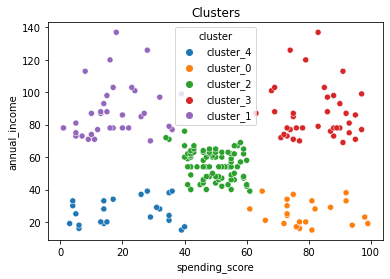

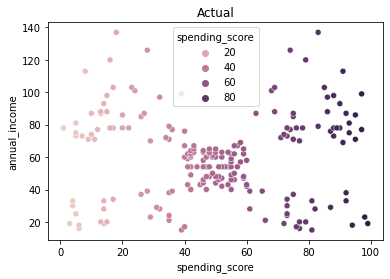

In [37]:
sns.scatterplot(x='spending_score', y='annual_income', hue='cluster', data=mall_df)
plt.title("Clusters")
plt.show()
sns.scatterplot(x='spending_score', y='annual_income', hue='spending_score', data=mall_df)
plt.title("Actual")
plt.show()

Text(0.5, 1.0, 'Visualizing Cluster Centers')

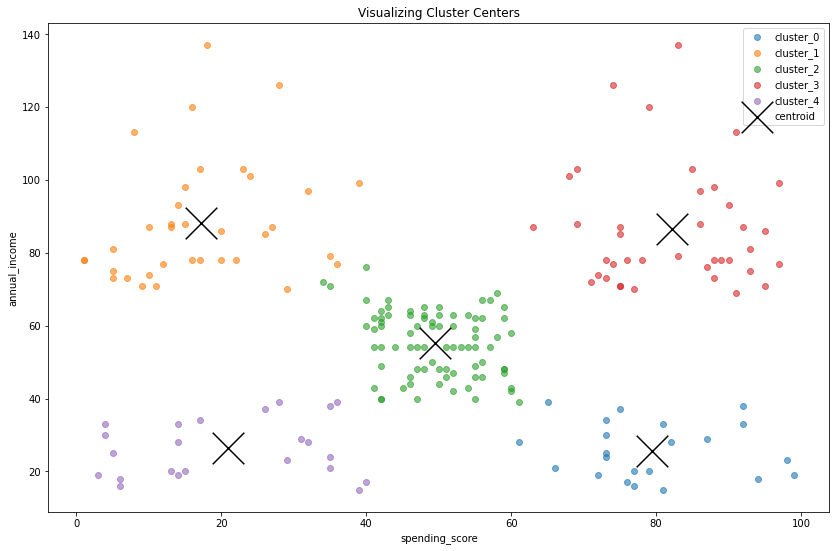

In [38]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)

plt.figure(figsize=(14, 9))

for cluster, subset in mall_df.groupby('cluster'):
    plt.scatter(subset.spending_score, subset.annual_income, label=cluster, alpha=.6)
    
centroids.plot.scatter(x='spending_score', y='annual_income', c="black", marker="x", s=1000, ax=plt.gca(), label="centroid")

plt.legend()
plt.xlabel('spending_score')
plt.ylabel('annual_income')
plt.title('Visualizing Cluster Centers')

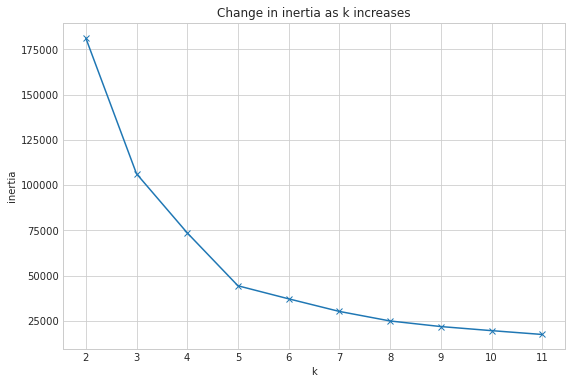

In [44]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [39]:
scaler = sklearn.preprocessing.MinMaxScaler()

scaler.fit(X)

X_scaled = pd.DataFrame(scaler.transform(X), columns=['spending_score', 'annual_income'])
X_scaled.sample(14)

,spending_score,annual_income
8,0.020408,0.032787
30,0.030612,0.122951
97,0.500000,0.368852
147,0.744898,0.508197
138,0.091837,0.483607
156,0.000000,0.516393
32,0.030612,0.147541
18,0.285714,0.065574
110,0.520408,0.393443
101,0.479592,0.385246


In [40]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X_scaled)

mall_df['cluster_scaled'] = kmeans.predict(X_scaled)
mall_df['cluster_scaled'] = "cluster_" + mall_df.cluster_scaled.astype(str)

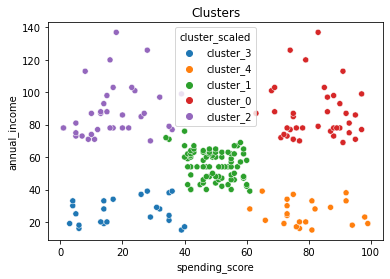

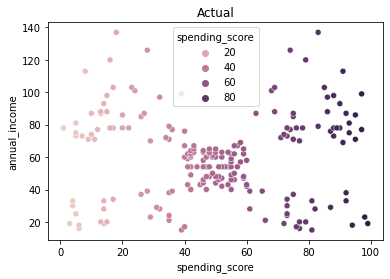

In [41]:
sns.scatterplot(x='spending_score', y='annual_income', hue='cluster_scaled', data=mall_df)
plt.title("Clusters")
plt.show()
sns.scatterplot(x='spending_score', y='annual_income', hue='spending_score', data=mall_df)
plt.title("Actual")
plt.show()

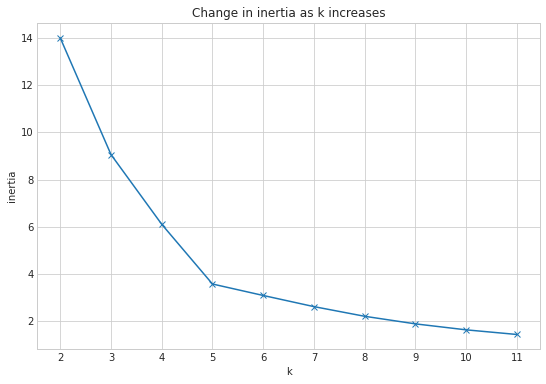

In [43]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

Seems like there is a steeper drop in inertia when adding clusters to scaled data up to 5 clusters.